In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('../analysis_table.csv')

In [56]:
df_group=df.groupby(['event_name', "lag_event_name"])['time_difference_events'].agg(['mean', 'count','std']).reset_index()
print(df_group)

             event_name       lag_event_name       mean  count        std
0    event_name_unknown   event_name_unknown   5.980000      1        NaN
1    event_name_unknown           final_call   8.962667     15  14.406897
2    event_name_unknown  on_site_appointment  16.146000     50  16.761246
3    event_name_unknown         project_call  11.172368     38   7.210141
4            final_call   event_name_unknown  10.261667     48   7.389755
5            final_call           final_call  14.036364     99  12.067163
6            final_call          first_order  54.334667     30   5.774762
7            final_call  on_site_appointment  25.527579    504  18.289293
8            final_call         project_call  11.752172  16220   8.988603
9   on_site_appointment          first_order  27.650422  17979  19.917042
10  on_site_appointment  on_site_appointment   0.573636     11   1.199819
11  on_site_appointment         project_call   0.453711    194   1.043258
12         project_call           fina

In [ ]:
#Check inconsistency
#!!!!!Can keep for process analysis as time difference assumes event and lag event depending on time. So the name of lag event could be wrong but the time difference is correct!!!
df_inconsistencies_skip_sequence=df[(df['event_name'] == 'on_site_appointment') & (df['lag_event_name']== 'project_call')].sort_values(by='time_difference_events', ascending=False)
df_inconsistencies_skip_sequence

In [45]:
#FIlter out incosistencies
filtered_df = df[
    ((df['event_name'] == 'on_site_appointment') & (df['lag_event_name'] == 'first_order'))|
    ((df['event_name'] == 'project_call') & (df['lag_event_name'] == 'on_site_appointment'))|
    ((df['event_name'] == 'final_call') & (df['lag_event_name'] == 'project_call'))
]


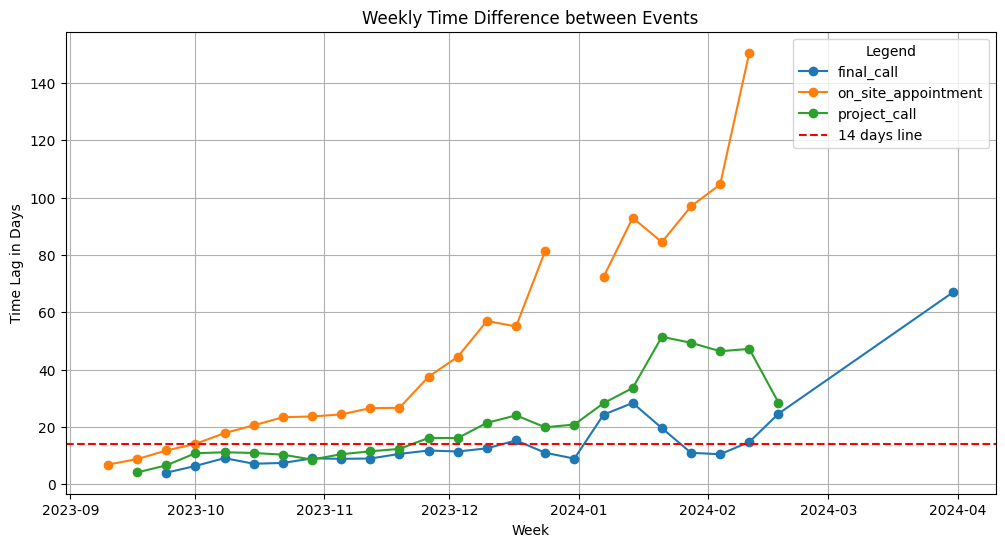

In [50]:
df_time_test=filtered_df[filtered_df['event_name'].isin(['on_site_appointment', 'project_call', 'final_call'])]
df_time_test['event_time'] = pd.to_datetime(df['event_time'])
df_time_test.set_index('event_time', inplace=True)
event_weekly_time_difference = df_time_test.groupby(['event_name', pd.Grouper(freq='W')])['time_difference_events'].mean()
event_weekly_counts = event_weekly_time_difference.reset_index(name='time_difference_events')

pivot_data_test = event_weekly_counts.pivot(index='event_time', columns='event_name', values='time_difference_events')

# Plotting
plt.figure(figsize=(12, 6))
for column in pivot_data_test.columns:
    plt.plot(pivot_data_test.index, pivot_data_test[column], marker='o', label=column)
plt.title('Weekly Time Difference between Events')
plt.xlabel('Week')
plt.ylabel('Time Lag in Days')
plt.axhline(y=14, color='r', linestyle='--', label='14 days line')
plt.grid(True)
plt.legend(title='Legend')
plt.show()

/var/folders/m8/mtfhq9yn11l785hjqrbqdmnc0000gn/T/ipykernel_92214/3162225082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['event_time'] = pd.to_datetime(df['event_time'])


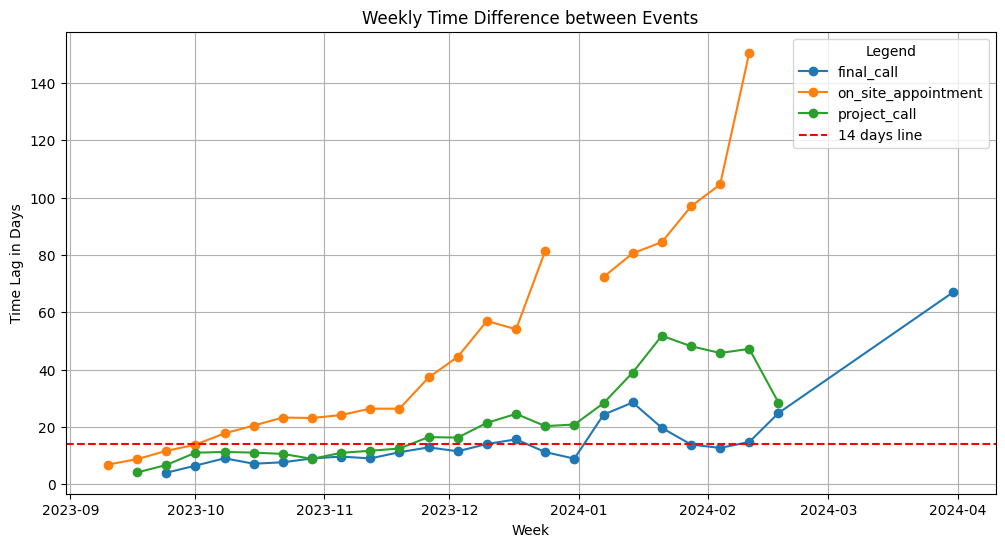

In [57]:
#Weekly Time Lag analysis
#Filter out first_order as no lag and event_name_unknown

df_time=df[df['event_name'].isin(['on_site_appointment', 'project_call', 'final_call'])]
df_time['event_time'] = pd.to_datetime(df['event_time'])
df_time.set_index('event_time', inplace=True)
event_weekly_time_difference = df_time.groupby(['event_name', pd.Grouper(freq='W')])['time_difference_events'].mean()
event_weekly_counts = event_weekly_time_difference.reset_index(name='time_difference_events')

pivot_data = event_weekly_counts.pivot(index='event_time', columns='event_name', values='time_difference_events')

# Plotting
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)
plt.title('Weekly Time Difference between Events')
plt.xlabel('Week')
plt.ylabel('Time Lag in Days')
plt.axhline(y=14, color='r', linestyle='--', label='14 days line')
plt.grid(True)
plt.legend(title='Legend')
plt.show()

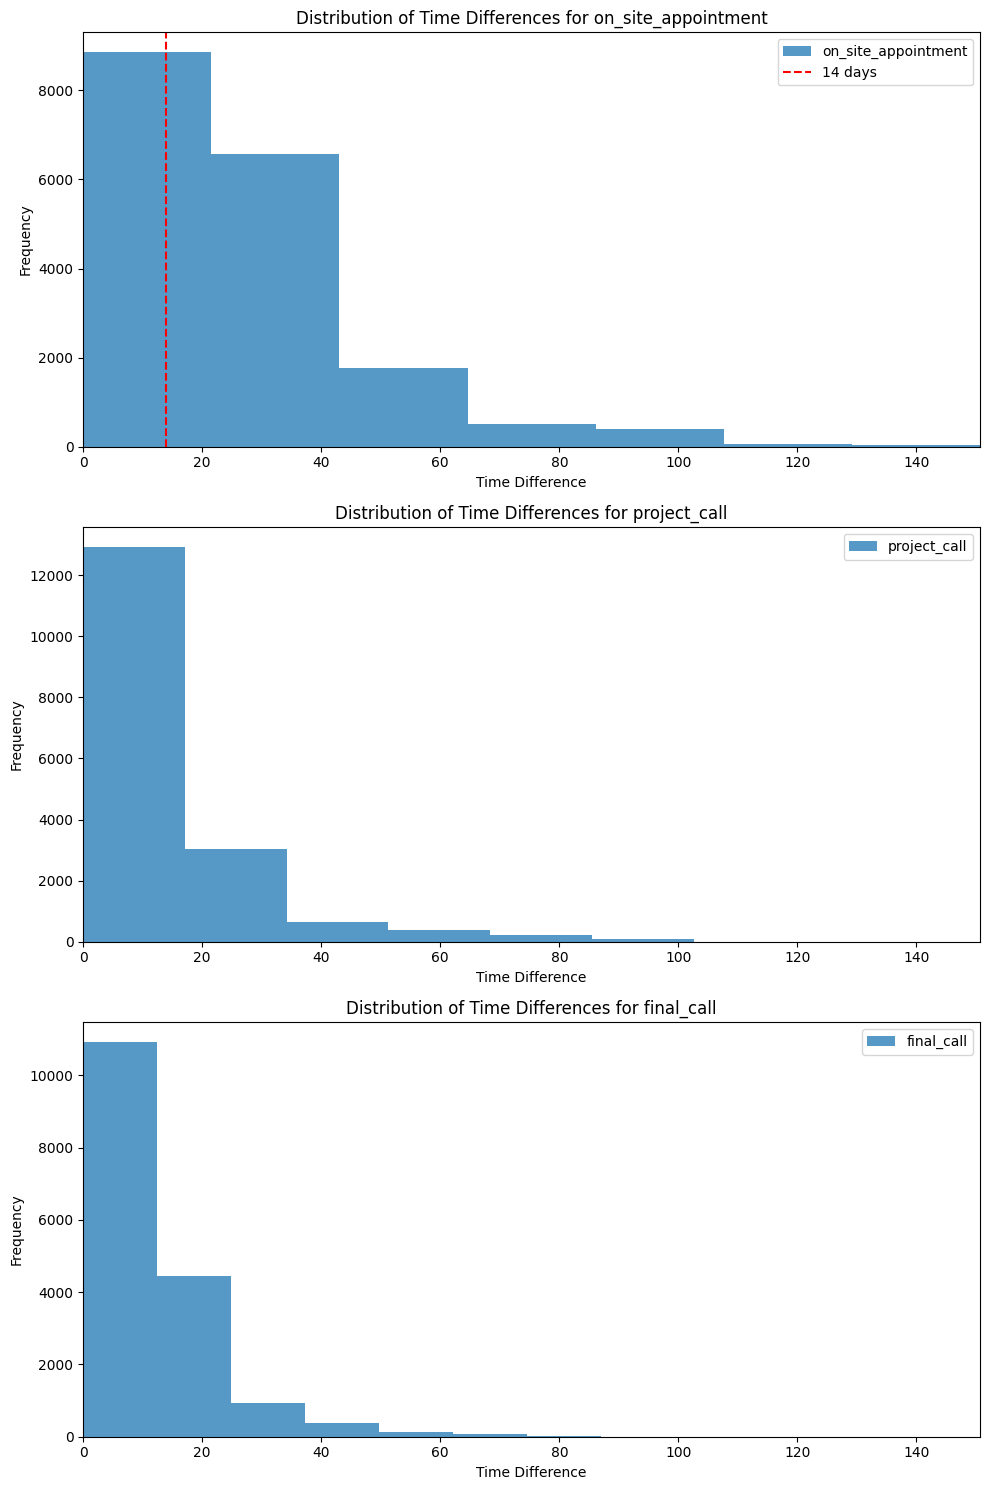

In [11]:
#Analyze process time between events
#Filter out unknown_events and first_order

#event_names=df['event_name'].unique()
event_names = ['on_site_appointment', 'project_call', 'final_call']

x_min = df['time_difference_events'].min()
x_max = df['time_difference_events'].max()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(event_names), figsize=(10, 5 * len(event_names)))


# Plot each event in a separate subplot
for ax, event in zip(axes, event_names):
    subset = df[df['event_name'] == event]
    ax.hist(subset['time_difference_events'].dropna(), bins=7, alpha=0.75, label=str(event))
    ax.set_title(f'Distribution of Time Differences for {event}')
    ax.set_xlabel('Time Difference')
    ax.set_ylabel('Frequency')
    ax.legend()

    ax.set_xlim(x_min, x_max)
    if event == 'on_site_appointment':
        ax.axvline(x=14, color='r', linestyle='--', label='14 days')
        ax.legend()

plt.tight_layout()
plt.show()

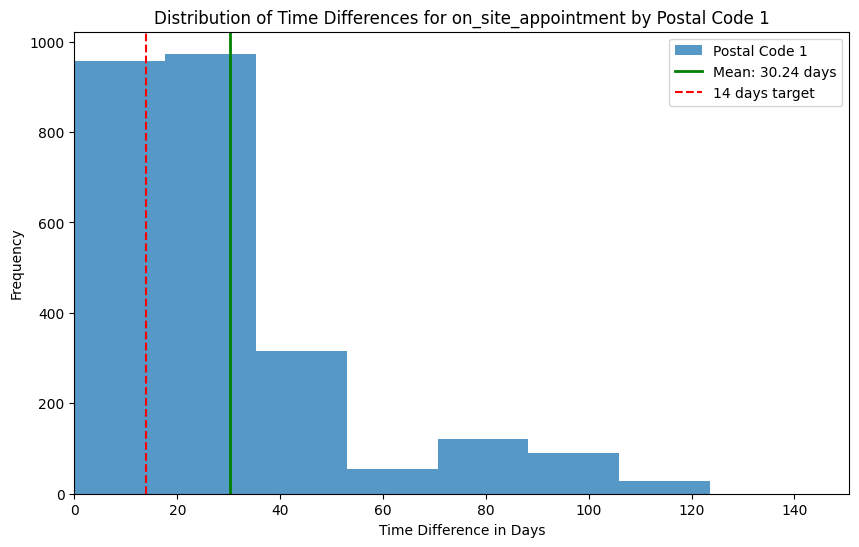

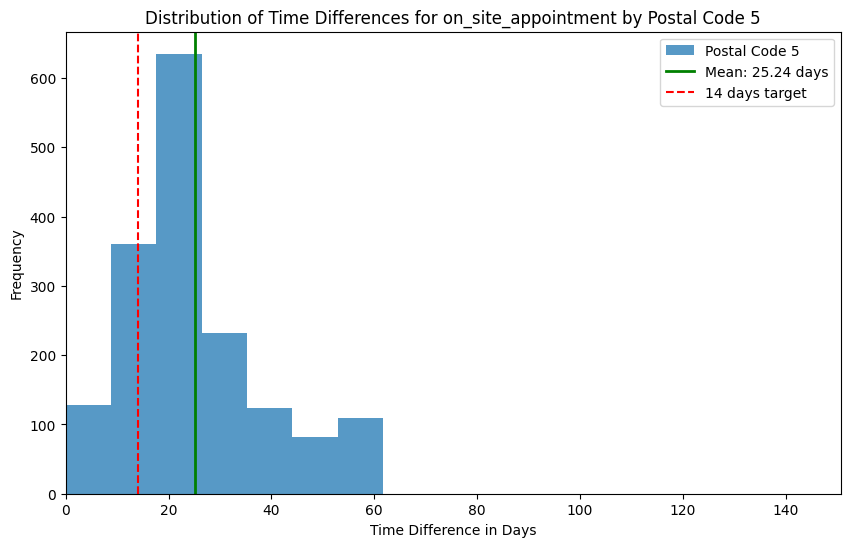

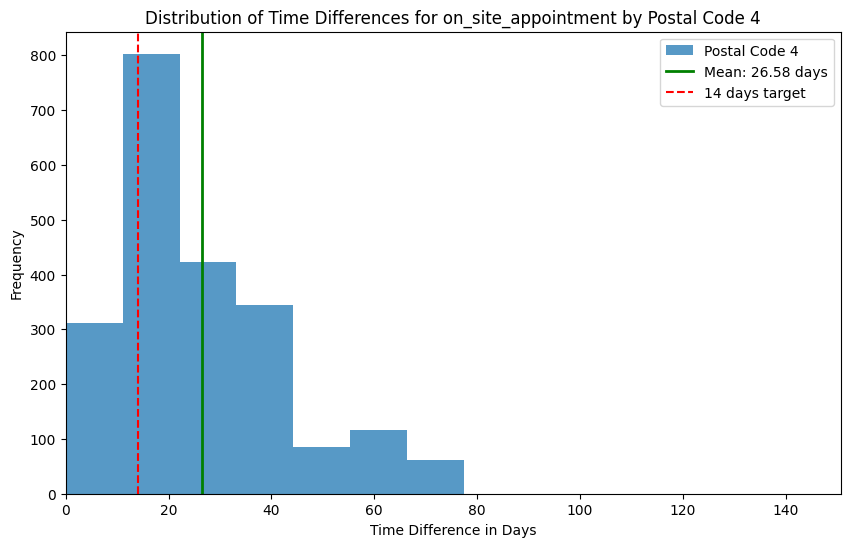

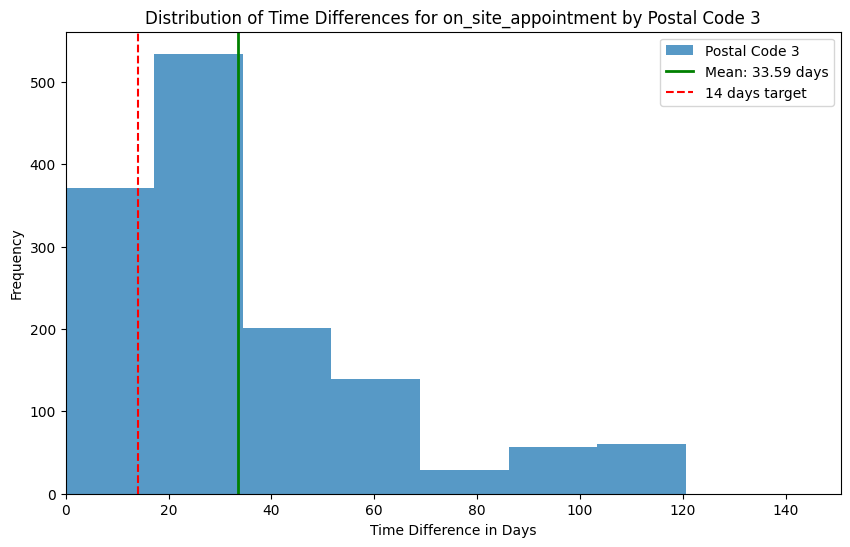

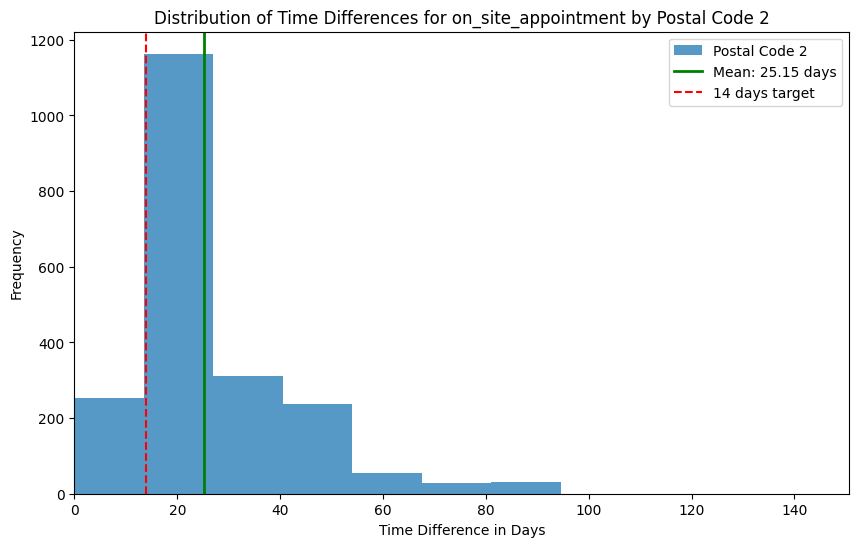

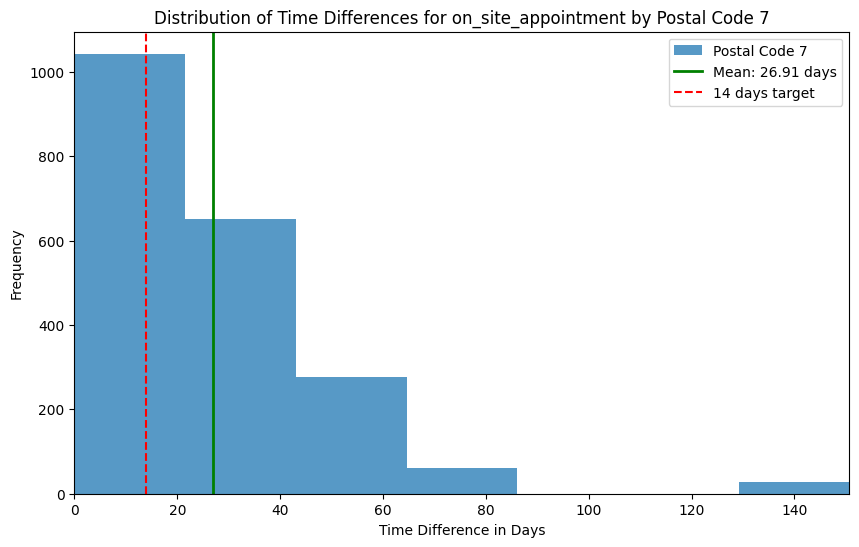

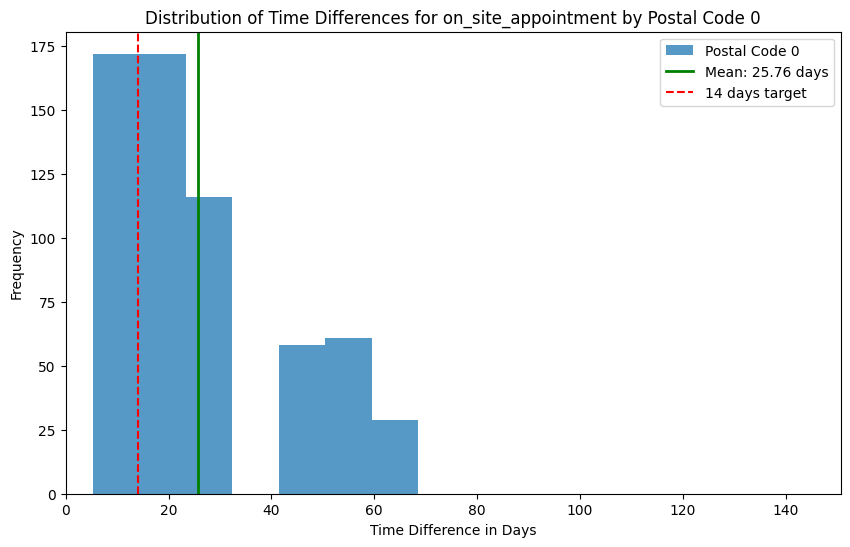

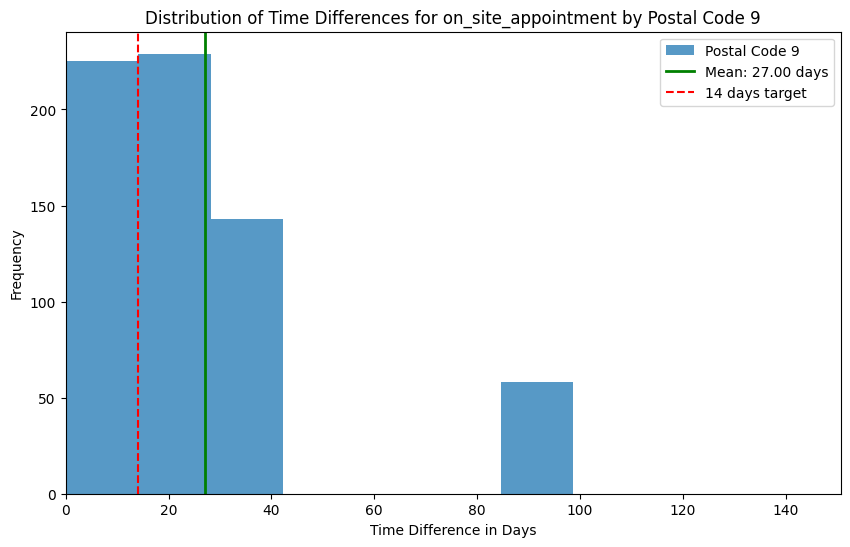

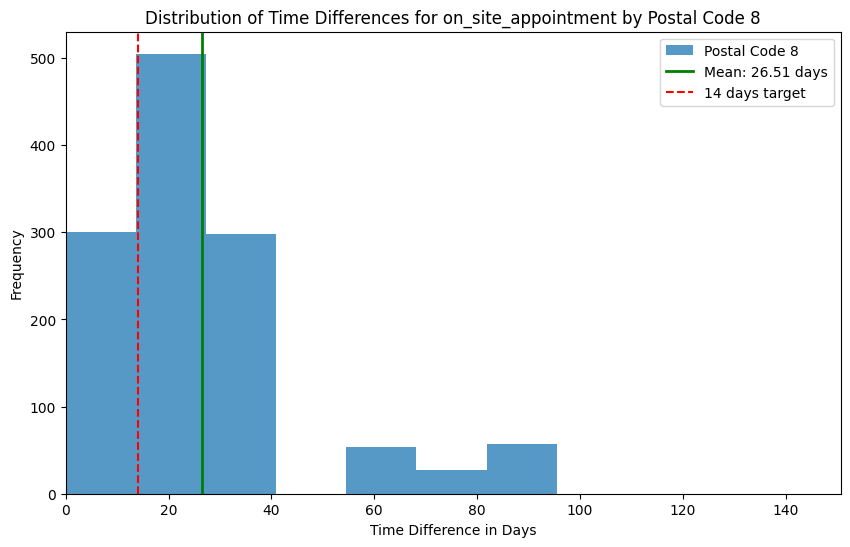

In [42]:
#GEOGRAPHICAL ANALYSIS
#Postal code group
event_names = ['on_site_appointment']

#Remove postal code na and postal code with 6 digits(2 observations)
#postal_codes_group = df['postal_code_group'].unique()  # Unique postal codes

event_name = 'on_site_appointment'
postal_codes_group = [1, 5, 4, 3, 2, 7, 0, 9, 8]

# Get min and max for consistent axis scaling
x_min = df['time_difference_events'].min()
x_max = df['time_difference_events'].max()

for postal_code in postal_codes_group:
    subset = df[(df['event_name'] == event_name) & (df['postal_code_group'] == postal_code)]
    plt.figure(figsize=(10, 6))  # New figure for each postal code group

    plt.hist(subset['time_difference_events'].dropna(), bins=7, alpha=0.75, label=f'Postal Code {postal_code}')
    plt.title(f'Distribution of Time Differences for {event_name} by Postal Code {postal_code}')
    plt.xlabel('Time Difference in Days')
    plt.ylabel('Frequency')

    # Calculate and plot the mean line
    mean_val = subset['time_difference_events'].mean()
    plt.axvline(mean_val, color='g', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f} days')

    plt.axvline(x=14, color='r', linestyle='--', label='14 days target')
    plt.legend()
    plt.xlim(x_min, x_max)
    plt.show()

In [18]:
#Ckeck inconsistencies
df_postal_check=df[df['postal_code_group']==10]
df_postal_check

,customer_id,event_time,event_name,_source,lag_event_time,time_difference_events,lag_event_name,postal_code_group
53742,b830647d20,2023-10-02 01:00:00,first_order,orders_table,NaN,NaN,NaN,10.0
66685,e517c88626,2023-10-02 01:00:00,first_order,orders_table,NaN,NaN,NaN,10.0


In [30]:
import scipy.stats as stats
#Comparing mean of groups
# Example of applying Kruskal-Wallis by hand for 'on_site_appointment'
data_groups = [df[(df['event_name'] == 'on_site_appointment') & (df['postal_code_group'] == pc)]['time_difference_events'].dropna() for pc in postal_codes_group]
stat, p = stats.kruskal(*data_groups)

print(f'Statistic: {stat}, p-value: {p}')

Statistic: 140.99358208737038, p-value: 6.432326832780316e-26
